In [10]:
from keras.models import load_model
import keras
import os, shutil

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './simpsons_small'   
    
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

simpson_labels = os.listdir(train_dir)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
(150, 150)


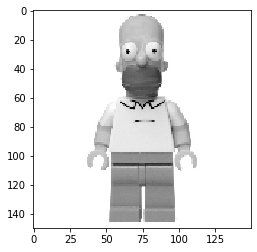

In [11]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
K.set_session(tf.Session(config=config))

# 저장된 모델 불러오기
model = load_model('simpson_lr15e5_rmsprop.h5')

# 이미지 파일 불러오기
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# 이미지 불러오기 / 전처리
img_name = 'sim007.jpg'
img = image.load_img('test_image/%s'%img_name, target_size=(150,150))
img = img.convert('L')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.
img_gray = img_tensor.reshape(150,150)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')

plt.show()


In [12]:
from keras import models

# 상위 8개 층의 출력을 추출합니다:
layer_outputs = [layer.output for layer in model.layers[:8]]
# 입력에 대해 8개 층의 출력을 반환하는 모델을 만듭니다:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환합니다:
activations = activation_model.predict(img_tensor)

In [13]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 150, 150, 64)


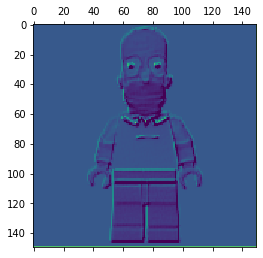

In [14]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

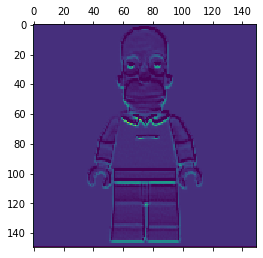

In [15]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


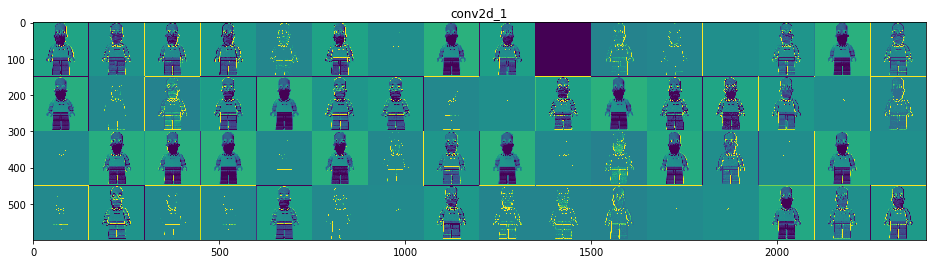

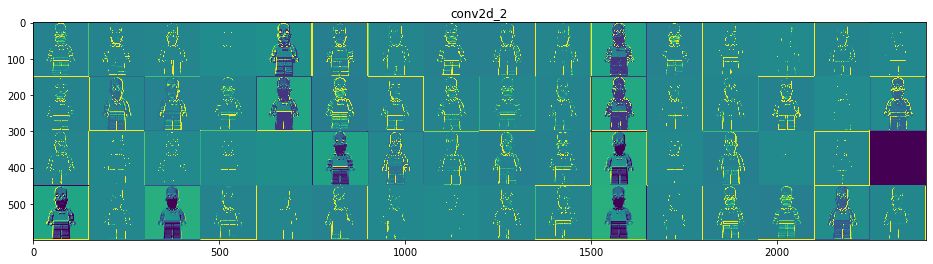

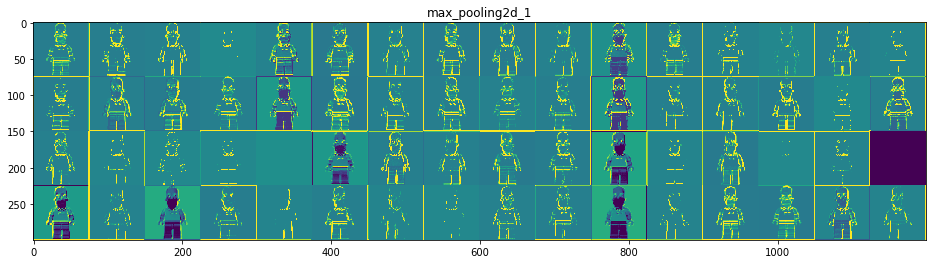

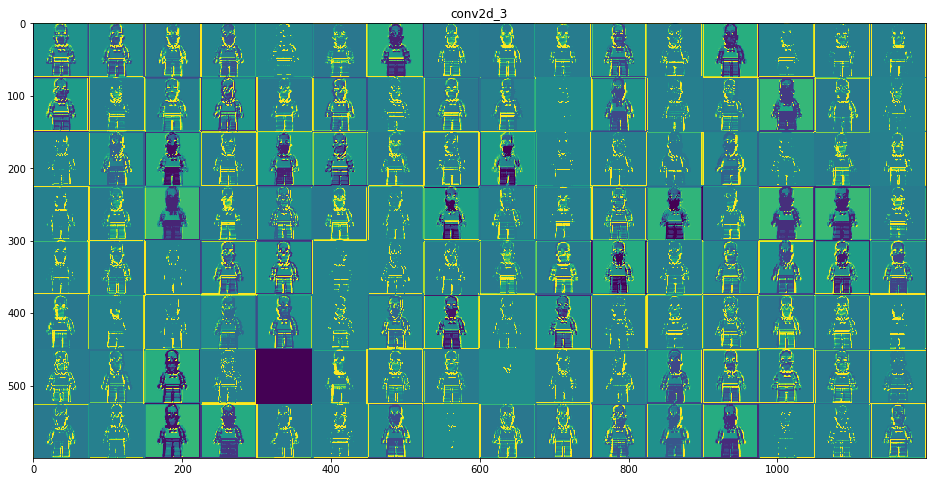

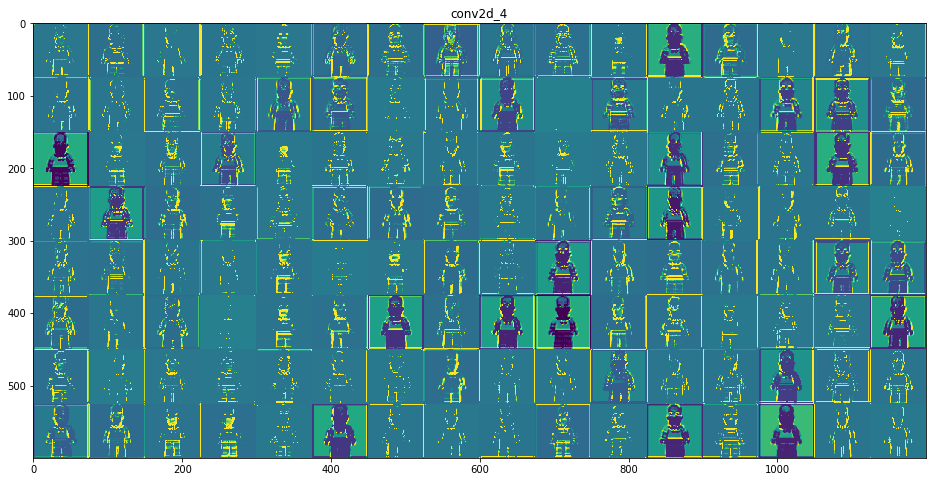

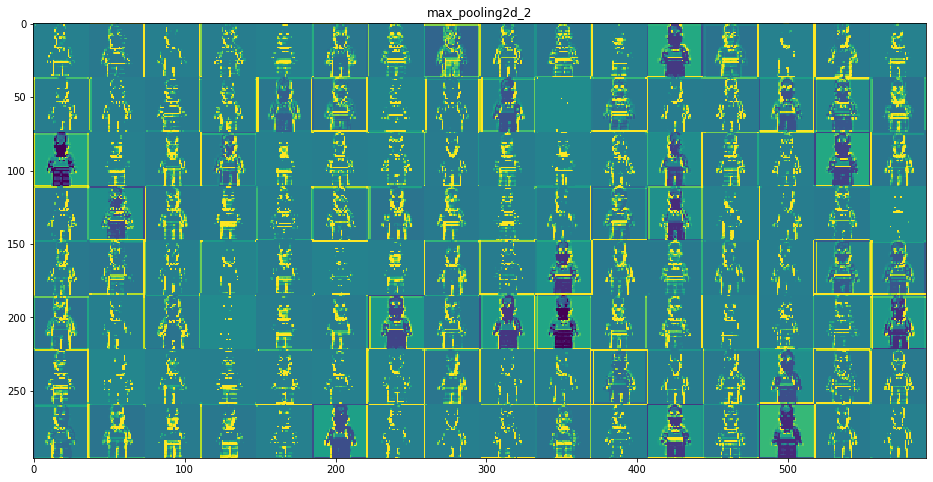

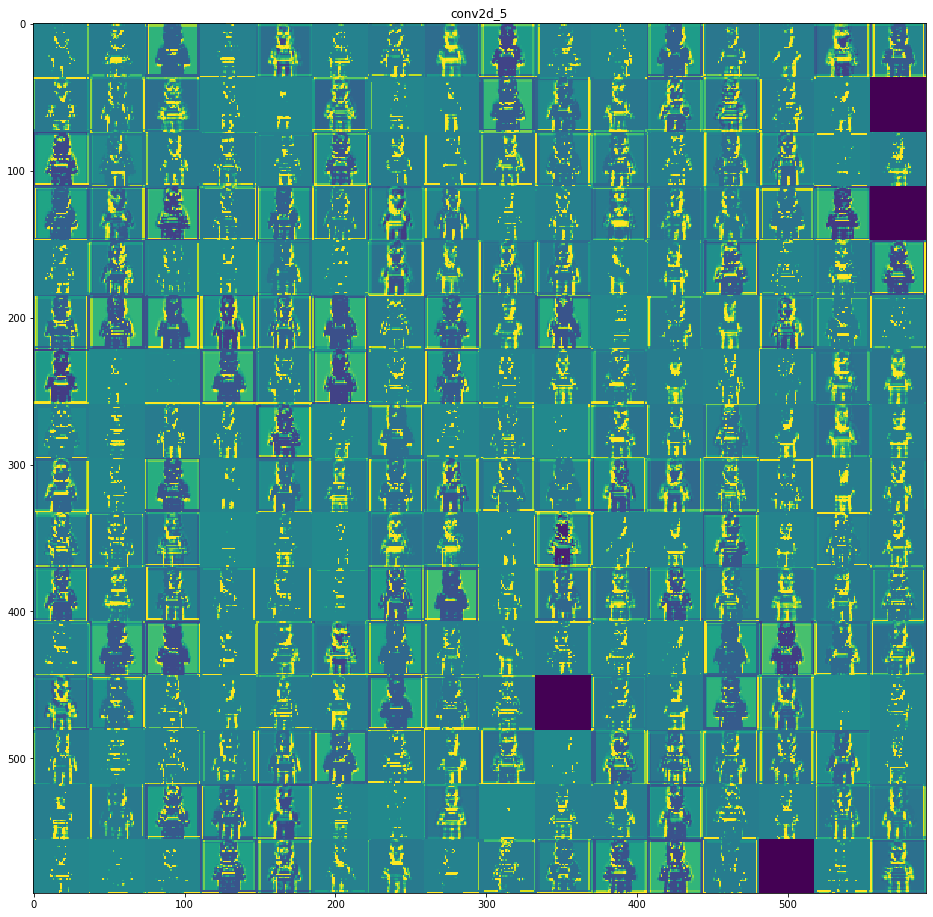

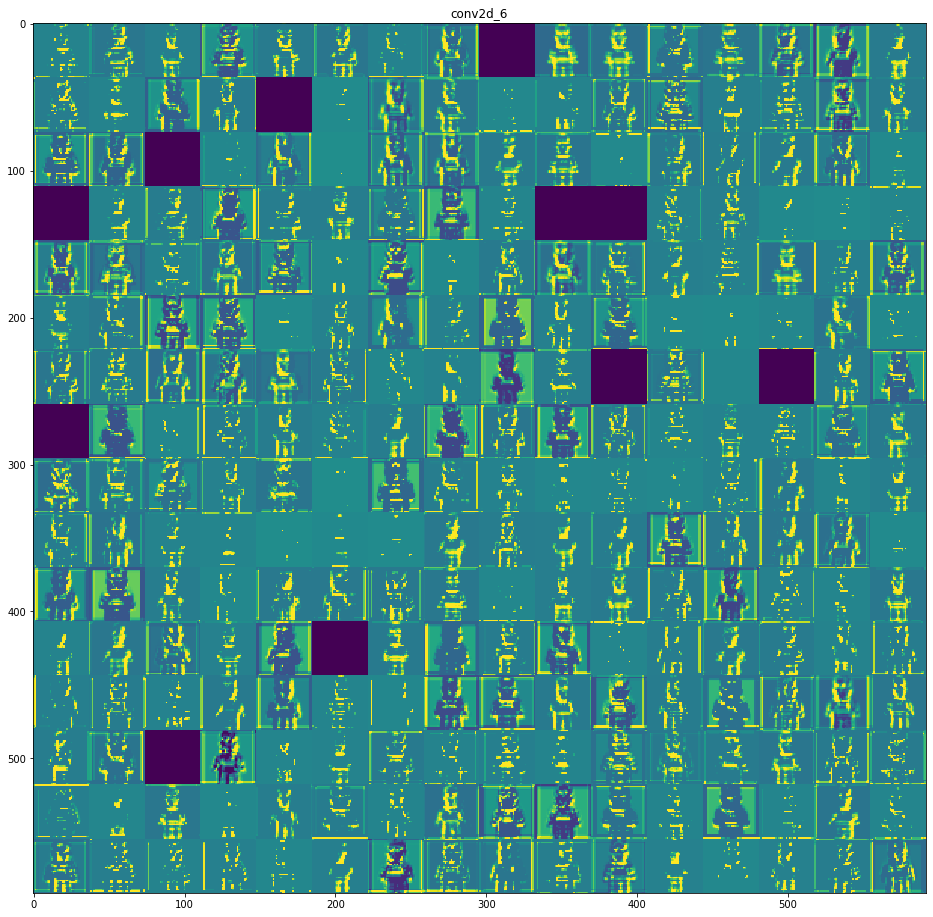

In [16]:
# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()